# Introduction

Since I've been working on a lot of Kaggle competitions, I use Pandas quite a bit. As you may know, Pandas (in addition to Numpy) is the go-to Python library for all your data science needs. It helps with dealing with input data in CSV formats and with transforming your data into a form where it can be inputted into ML models. However, getting comfortable with the ideas of dataframes, slicing, etc was very tough for me in the beginning. Hopefully, this short tutorial can show you a lot of different commands that will help you gain the most insights into your dataset. 

In [1]:
import pandas as pd

# Loading in Data

The first step in any ML problem is identifying what format your data is in, and then loading it into whatever framework you're using. For Kaggle compeitions, a lot of data can be found in CSV files, so that's the example we're going to use. 

Since I'm a huge sports fan, we're going to be looking at a sports dataset that shows the results from NCAA basketball games from 1985 to 2016. This dataset is in a CSV file, and the function we're going to use to read in the file is called **pd.read_csv()**. This function returns a **dataframe** variable. The dataframe is the golden jewel data structure for Pandas. It is defined as "a two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns)".

Just think of it as a table for now. 

In [2]:
df = pd.read_csv('RegularSeasonCompactResults.csv')

# The Basics

Now that we have our dataframe in our variable df, let's look at what it contains. We can use the function **head()** to see the first couple rows of the dataframe (or the function **tail()** to see the last few rows).

In [3]:
df.head(1)


,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
0,1985,20,1228,81,1328,64,N,0


In [4]:
df.tail()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
145284,2016,132,1114,70,1419,50,N,0
145285,2016,132,1163,72,1272,58,N,0
145286,2016,132,1246,82,1401,77,N,1
145287,2016,132,1277,66,1345,62,N,0
145288,2016,132,1386,87,1433,74,N,0


We can see the dimensions of the dataframe using the the **shape** attribute

In [5]:
df.shape

(145289, 8)

We can also extract all the column names as a list, by using the **columns** attribute and can extract the rows with the **index** attribute

In [6]:
df.columns.to_list()

['Season', 'Daynum', 'Wteam', 'Wscore', 'Lteam', 'Lscore', 'Wloc', 'Numot']

In order to get a better idea of the type of data that we are dealing with, we can call the **describe()** function to see statistics like mean, min, etc about each column of the dataset. 

In [7]:
df.describe()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Numot
count,145289.000000,145289.000000,145289.000000,145289.000000,145289.000000,145289.000000,145289.000000
mean,2001.574834,75.223816,1286.720646,76.600321,1282.864064,64.497009,0.044387
std,9.233342,33.287418,104.570275,12.173033,104.829234,11.380625,0.247819
min,1985.000000,0.000000,1101.000000,34.000000,1101.000000,20.000000,0.000000
25%,1994.000000,47.000000,1198.000000,68.000000,1191.000000,57.000000,0.000000
50%,2002.000000,78.000000,1284.000000,76.000000,1280.000000,64.000000,0.000000
75%,2010.000000,103.000000,1379.000000,84.000000,1375.000000,72.000000,0.000000
max,2016.000000,132.000000,1464.000000,186.000000,1464.000000,150.000000,6.000000


Okay, so now let's looking at information that we want to extract from the dataframe. Let's say I wanted to know the max value of a certain column. The function **max()** will show you the maximum values of all columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145289 entries, 0 to 145288
Data columns (total 8 columns):
Season    145289 non-null int64
Daynum    145289 non-null int64
Wteam     145289 non-null int64
Wscore    145289 non-null int64
Lteam     145289 non-null int64
Lscore    145289 non-null int64
Wloc      145289 non-null object
Numot     145289 non-null int64
dtypes: int64(7), object(1)
memory usage: 8.9+ MB


Then, if you'd like to specifically get the max value for a particular column, you pass in the name of the column using the bracket indexing operator

In [9]:
wscore = df['Wscore']

In [10]:
wscore.std()

12.173032773082356

If you'd like to find the mean of the Losing teams' score. 

In [11]:
df['Lscore'].mean()

64.49700940883343

But what if that's not enough? Let's say we want to actually see the game(row) where this max score happened. We can call the **argmax()** function to identify the row index

In [12]:
df['Wscore'].idxmax()

24970

One of the most useful functions that you can call on certain columns in a dataframe is the **value_counts()** function. It shows how many times each item appears in the column. This particular command shows the number of games in each season

In [13]:
wscore.value_counts()

73     5048
75     5020
74     4997
76     4971
77     4793
72     4743
78     4737
71     4713
79     4679
70     4600
80     4550
69     4543
81     4361
68     4153
82     4021
67     3931
83     3855
66     3729
84     3533
65     3382
85     3375
64     3201
86     3183
87     3016
63     2824
88     2650
89     2478
62     2431
90     2236
61     2205
       ... 
141       5
142       5
135       4
137       4
138       4
139       4
152       4
140       3
150       3
151       3
148       2
143       2
36        2
35        2
147       2
159       1
172       1
186       1
166       1
162       1
34        1
156       1
157       1
155       1
153       1
181       1
149       1
145       1
146       1
173       1
Name: Wscore, Length: 130, dtype: int64

# Acessing Values

Then, in order to get attributes about the game, we need to use the **iloc[]** function. Iloc is definitely one of the more important functions. The main idea is that you want to use it whenever you have the integer index of a certain row that you want to access. As per Pandas documentation, iloc is an "integer-location based indexing for selection by position."

In [14]:
hello=df['Lscore'].idxmax()
hello

17867

In [15]:
df.iloc[hello]

Season    1989
Daynum      92
Wteam     1258
Wscore     181
Lteam     1109
Lscore     150
Wloc         H
Numot        0
Name: 17867, dtype: object

Let's take this a step further. Let's say you want to know the game with the highest scoring winning team (this is what we just calculated), but you then want to know how many points the losing team scored. 

In [16]:
df.iloc[[df['Wscore'].idxmax()]]['Lscore']

24970    140
Name: Lscore, dtype: int64

When you see data displayed in the above format, you're dealing with a Pandas **Series** object, not a dataframe object.

In [17]:
type(df.iloc[[df['Wscore'].idxmax()]]['Lscore'])

pandas.core.series.Series

In [18]:
type(df.iloc[[df['Wscore'].idxmax()]])

pandas.core.frame.DataFrame

The following is a summary of the 3 data structures in Pandas (Haven't ever really used Panels yet)

![](DataStructures.png)

When you want to access values in a Series, you'll want to just treat the Series like a Python dictionary, so you'd access the value according to its key (which is normally an integer index)

In [19]:
df.iloc[[df['Wscore'].idxmax()]]['Lscore'][24970]

140

The other really important function in Pandas is the **loc** function. Contrary to iloc, which is an integer based indexing, loc is a "Purely label-location based indexer for selection by label". Since all the games are ordered from 0 to 145288, iloc and loc are going to be pretty interchangable in this type of dataset

In [20]:
df.iloc[-10:]

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
145279,2016,131,1392,80,1436,74,H,0
145280,2016,131,1401,71,1261,38,N,0
145281,2016,131,1419,82,1426,71,N,0
145282,2016,131,1433,76,1172,54,N,0
145283,2016,131,1451,62,1285,59,N,0
145284,2016,132,1114,70,1419,50,N,0
145285,2016,132,1163,72,1272,58,N,0
145286,2016,132,1246,82,1401,77,N,1
145287,2016,132,1277,66,1345,62,N,0
145288,2016,132,1386,87,1433,74,N,0


In [21]:
df.loc[:3]

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0


Notice the slight difference in that iloc is exclusive of the second number, while loc is inclusive. 

Below is an example of how you can use loc to acheive the same task as we did previously with iloc

In [22]:
df.loc[df['Wscore'].idxmax(), 'Lscore']

140

A faster version uses the **at()** function. At() is really useful wheneever you know the row label and the column label of the particular value that you want to get. 

In [23]:
df.at[df['Wscore'].idxmax(), 'Lscore']

140

If you'd like to see more discussion on how loc and iloc are different, check out this great Stack Overflow post: http://stackoverflow.com/questions/31593201/pandas-iloc-vs-ix-vs-loc-explanation. Just remember that **iloc looks at position** and **loc looks at labels**. Loc becomes very important when your row labels aren't integers. 

# Sorting

Let's say that we want to sort the dataframe in increasing order for the scores of the losing team

In [24]:
df.sort_values(['Lscore', 'Season']).head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
100027,2008,66,1203,49,1387,20,H,0
49310,1997,66,1157,61,1204,21,H,0
89021,2006,44,1284,41,1343,21,A,0
85042,2005,66,1131,73,1216,22,H,0
103660,2009,26,1326,59,1359,22,H,0


In [25]:
df.groupby('Lscore')

# Filtering Rows Conditionally

Now, let's say we want to find all of the rows that satisy a particular condition. For example, I want to find all of the games where the winning team scored more than 150 points. The idea behind this command is you want to access the column 'Wscore' of the dataframe df (df['Wscore']), find which entries are above 150 (df['Wscore'] > 150), and then returns only those specific rows in a dataframe format (df[df['Wscore'] > 150]).

In [26]:
type(df['Wscore'])
df[df['Lscore'] < 50].count()
df.count()

Season    145289
Daynum    145289
Wteam     145289
Wscore    145289
Lteam     145289
Lscore    145289
Wloc      145289
Numot     145289
dtype: int64

In [27]:
df[df['Wscore'] > 150]

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
5269,1986,75,1258,151,1109,107,H,0
12046,1988,40,1328,152,1147,84,H,0
12355,1988,52,1328,151,1173,99,N,0
16040,1989,40,1328,152,1331,122,H,0
16853,1989,68,1258,162,1109,144,A,0
17867,1989,92,1258,181,1109,150,H,0
19653,1990,30,1328,173,1109,101,H,0
19971,1990,38,1258,152,1109,137,A,0
20022,1990,40,1116,166,1109,101,H,0
22145,1990,97,1258,157,1362,115,H,0


This also works if you have multiple conditions. Let's say we want to find out when the winning team scores more than 150 points and when the losing team scores below 100. 

In [28]:
df[(df['Wscore'] > 150) & (df['Lscore'] < 100)]

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
12046,1988,40,1328,152,1147,84,H,0
12355,1988,52,1328,151,1173,99,N,0
25656,1991,84,1106,151,1212,97,H,0
28687,1992,54,1261,159,1319,86,H,0
35023,1993,112,1380,155,1341,91,A,0
52600,1998,33,1395,153,1410,87,H,0


# Grouping

Another important function in Pandas is **groupby()**. This is a function that allows you to group entries by certain attributes (e.g Grouping entries by Wteam number) and then perform operations on them. The following function groups all the entries (games) with the same Wteam number and finds the mean for each group. 

In [29]:
df.groupby('Wteam')['Wscore'].mean().head(10)

Wteam
1101    78.111111
1102    69.893204
1103    75.839768
1104    75.825944
1105    74.960894
1106    76.634518
1107    70.804781
1108    79.489865
1109    90.428571
1110    72.141844
Name: Wscore, dtype: float64

This next command groups all the games with the same Wteam number and finds where how many times that specific team won at home, on the road, or at a neutral site

In [30]:
df.groupby('Wteam')['Wloc'].value_counts().head(9)

Wteam  Wloc
1101   H        12
       A         3
       N         3
1102   H       204
       A        73
       N        32
1103   H       324
       A       153
       N        41
Name: Wloc, dtype: int64

Each dataframe has a **values** attribute which is useful because it basically displays your dataframe in a numpy array style format

In [31]:
type(df.values)



numpy.ndarray

Now, you can simply just access elements like you would in an array. 

In [32]:
df.values[0][0]

1985

# Dataframe Iteration

In order to iterate through dataframes, we can use the **iterrows()** function. Below is an example of what the first two rows look like. Each row in iterrows is a Series object

In [33]:
for index, row in df.iterrows():
    print(row)
    if index == 1:
        break

Season    1985
Daynum      20
Wteam     1228
Wscore      81
Lteam     1328
Lscore      64
Wloc         N
Numot        0
Name: 0, dtype: object
Season    1985
Daynum      25
Wteam     1106
Wscore      77
Lteam     1354
Lscore      70
Wloc         H
Numot        0
Name: 1, dtype: object


# Extracting Rows and Columns

The bracket indexing operator is one way to extract certain columns from a dataframe.

In [34]:
df[['Wscore', 'Lscore']].head()

,Wscore,Lscore
0,81,64
1,77,70
2,63,56
3,70,54
4,86,74


Notice that you can acheive the same result by using the loc function. Loc is a veryyyy versatile function that can help you in a lot of accessing and extracting tasks. 

In [35]:
df.loc[:, ['Wscore', 'Lscore']].head()

,Wscore,Lscore
0,81,64
1,77,70
2,63,56
3,70,54
4,86,74


Note the difference is the return types when you use brackets and when you use double brackets. 

In [36]:
type(df['Wscore'])

pandas.core.series.Series

In [37]:
type(df[['Wscore']])

pandas.core.frame.DataFrame

You've seen before that you can access columns through df['col name']. You can access rows by using slicing operations. 

In [38]:
df[0:3]

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0


Here's an equivalent using iloc

In [39]:
df.iloc[0:3,:3]

,Season,Daynum,Wteam
0,1985,20,1228
1,1985,25,1106
2,1985,25,1112


# Data Cleaning

One of the big jobs of doing well in Kaggle competitions is that of data cleaning. A lot of times, the CSV file you're given (especially like in the Titanic dataset), you'll have a lot of missing values in the dataset, which you have to identify. The following **isnull** function will figure out if there are any missing values in the dataframe, and will then sum up the total for each column. In this case, we have a pretty clean dataset.

In [40]:
df.isnull().sum()

Season    0
Daynum    0
Wteam     0
Wscore    0
Lteam     0
Lscore    0
Wloc      0
Numot     0
dtype: int64

If you do end up having missing values in your datasets, be sure to get familiar with these two functions. 
* **dropna()** - This function allows you to drop all(or some) of the rows that have missing values. 
* **fillna()** - This function allows you replace the rows that have missing values with the value that you pass in.

# Visualizing Data

An interesting way of displaying Dataframes is through matplotlib. 

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
bing = df[['Wscore', 'Wteam']]



Text(0.5, 0, 'Points for Winning Team')

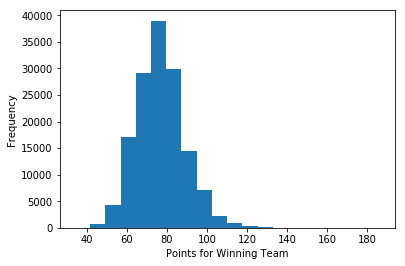

In [43]:
ax = df['Wscore'].plot.hist(bins=20)
ax.set_xlabel('Points for Winning Team')

# Creating Kaggle Submission CSVs

This isn't directly Pandas related, but I assume that most people who use Pandas probably do a lot of Kaggle competitions as well. As you probably know, Kaggle competitions require you to create a CSV of your predictions. Here's some starter code that can help you create that csv file

In [44]:
import numpy as np
import csv

results = [[0,10],[1,15],[2,20]]
results = pd.np.array(results)
print(results)

[[ 0 10]
 [ 1 15]
 [ 2 20]]


The approach I described above deals more with python lists and numpy. If you want a purely Pandas based approach, take a look at this video: https://www.youtube.com/watch?v=ylRlGCtAtiE&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=22

# Other Useful Functions

* **drop()** - This function removes the column or row that you pass in (You also have the specify the axis). 
* **agg()** - The aggregate function lets you compute summary statistics about each group
* **apply()** - Lets you apply a specific function to any/all elements in a Dataframe or Series
* **get_dummies()** - Helpful for turning categorical data into one hot vectors.
* **drop_duplicates()** - Lets you remove identical rows

# Lots of Other Great Resources

Pandas has been around for a while and there are a lot of other good resources if you're still interested on getting the most out of this library. 
* http://pandas.pydata.org/pandas-docs/stable/10min.html
* https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python
* http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/
* https://www.dataquest.io/blog/pandas-python-tutorial/
* https://drive.google.com/file/d/0ByIrJAE4KMTtTUtiVExiUGVkRkE/view
* https://www.youtube.com/playlist?list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y

In [45]:
import pandas as pd
!ls ..

lec1-2019-04-12 lec2-2019-05-10


In [46]:
titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Programming Challenge:
- How many male and female passengers were in Titanic?
- What percentage of people surviced the accident? How many men, and how many women?
- How does survival rate compare in cabin class?
- Create age buckets and visualize survival histogram for the buckets.


In [47]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [48]:
titanic_df.groupby("Sex")["PassengerId"].count()


Sex
female    314
male      577
Name: PassengerId, dtype: int64

In [49]:
survived = titanic_df[titanic_df['Survived']==1]
died = titanic_df[titanic_df['Survived']==0]
print("Total Passengers: {}, Survived: {}, Died: {}".format(titanic_df["PassengerId"].count(), 
                                                            survived['PassengerId'].count(), 
                                                            died["PassengerId"].count()))
female_survivors = survived[survived["Sex"]=='female']["PassengerId"].count()
male_survivors = survived[survived["Sex"]=='male']["PassengerId"].count()
print("male survival rate: {}, female survival rate: {}".format((male_survivors/577)*100, 
                                                                (female_survivors/314)*100))

Total Passengers: 891, Survived: 342, Died: 549
male survival rate: 18.890814558058924, female survival rate: 74.20382165605095
